# Посмотрим на данные


In [ ]:
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Самые популярные исполнители. Данные по одному слушателю, по scrobble - метрика наслушанных треков

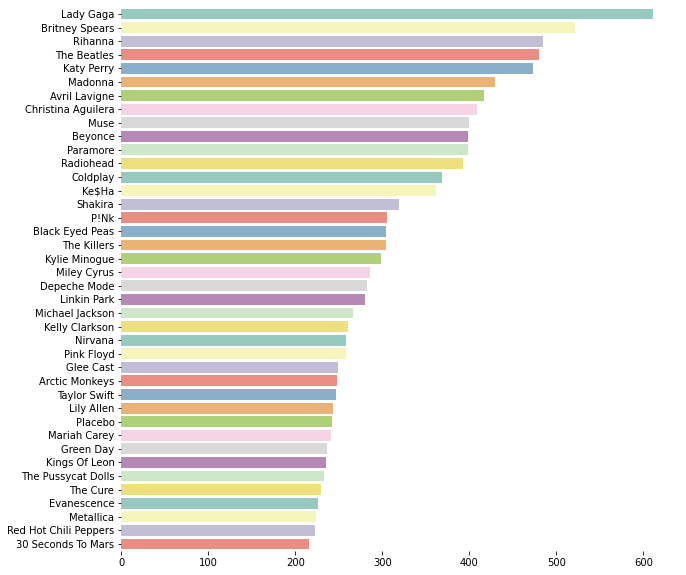

In [ ]:
data = pd.merge(artist_df, scrobbles_df, on=["artist_id"], how="inner")
pop_songs = data.groupby('artist_name')['scrobbles'].count().reset_index().sort_values(['scrobbles', 'artist_name'], ascending = [0,1])
pop_songs = pop_songs[:40]

labels = pop_songs['artist_name'].tolist()
counts = pop_songs['scrobbles'].tolist()

plt.figure(figsize=(10,10))
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

# Задание
Создать рекомендательную систему по музыкальным предпочтениям данным прослушиваниямузыки на сервисе Last.FM (на базе item-based подхода). 

Вариантов реализации рекомендательных систем всегда много, поэтому выбор конкретной реализации за Вами. В этих шагах предложена самая простая версия через сингулярное разложение и матрицу смежности, см. статью с примером в п.3)

Зарегистрироваться на сервисе kaggle.com и выгрузить датасет Last.FM, познакомиться из описания, что значат каждые значения колонок. Загрузить 2 файла датасета в Google Colab и из них сделать сделать таблички artists, scrobbles.

Сделать рекомендательную систему. (Базовый уровень для сдачи задания: Код и шаги самой простой версии рекомендуется взять отсюда: https://predictivehacks.com/item-based-collaborative-filtering-in-python/)

Сравнить Ваши результаты рекомендаций и примерами из прикладного кейса «Одноклассники». Какая версия на Ваш взгляд лучше работает по Вашему личному смыслу музыкальных рекомендаций?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

artist_df = pd.read_csv('/content/drive/MyDrive/lastfm_artist_list.csv')
scrobbles_df = pd.read_csv('/content/drive/MyDrive/lastfm_user_scrobbles.csv')

print('---------Datasets--------\n')
print(artist_df.info())
print()
print(scrobbles_df.info())

---------Datasets--------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17493 entries, 0 to 17492
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_id    17493 non-null  int64 
 1   artist_name  17493 non-null  object
dtypes: int64(1), object(1)
memory usage: 273.5+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92792 entries, 0 to 92791
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    92792 non-null  int64
 1   artist_id  92792 non-null  int64
 2   scrobbles  92792 non-null  int64
dtypes: int64(3)
memory usage: 2.1 MB
None


In [ ]:
df = pd.merge(artist_df, scrobbles_df, on=["artist_id"], how="inner")

## Решение задачи базовым методом

Развернем данные

In [ ]:
df = df.pivot_table(values='scrobbles', index='user_id', columns='artist_name', fill_value=0)

In [ ]:
df.head()

artist_name,!!!,!Deladap,!Distain,#####,#2 Orchestra,$Lick,$Lick Feat. Six-Fo,(1962-1966),(Hed) Planet Earth,(Pre) Kingdom,(Sic)Monic,(We Are) Performance,*Nsync,+\-,-123 Min.,-Oz-,-T De Sangre,...And The Earth Swarmed With Them,...And You Will Know Us By The Trail Of Dead,.38 Special,.Crrust,06 Children Of The Cross,1-800-Zombie,10 Years,10-20 Без Выходных,100 Bitches,1000names,100blumen,100dbs,100deadrabbits!!!,10cc,11.43,110,112,1125,12 Rounds,12 Stones,120 Days,1200 Micrograms,12012,...,미인도(美人圖),민호,박정현,반야,배치기,백지영,비,빅뱅,샤이니,서태지,소녀시대,소녀시대 ＆ 2pm,손담비,송지은,승리,시크릿,신화,아웃사이더,아이비,애프터 스쿨(After School),엠블랙(Mblaq),원더걸스,윤하,이박사,이수영(여),이정현,이효리,장근석,제빵왕,태양,티아라,현아,Ｂｏｏｇｉｅｍａｎ,Ｂｏｒｎ,ＬｕＬｕ,ＭＡＮＮＥＱＵＩＮ,Ｍａｃｈｉｎｅ,ＰＥＲＥＳＴＲＯＩＫＡ,ＲＥＤ,ＶａｎｅｓｓＡ
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Поскольку нам нужна совместная фильтрация на основе элементов, мы транспонируем матрицу

In [ ]:
X = df.T

Используем SVD - метод опорных векторов

In [ ]:
import numpy as np
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=5)
df_res = SVD.fit_transform(X)
df_res.shape

(17492, 12)

Корреляция Пирсона

In [ ]:
corr_mat = np.corrcoef(df)
corr_mat.shape

(17492, 17492)

Посмотрим метод Correlation Pearson. Создадим корреляционную матрицу:

In [ ]:
col_idx = df.columns.get_loc("Nirvana")
corr_specific = corr_mat[col_idx]
res_df = pd.DataFrame({'corr_specific':corr_specific, 'Recommended artists': df.columns})\
.sort_values('corr_specific', ascending=False)\
.head(30)

res_df

,corr_specific,Recommended artists
10695,1.000000,Nirvana
12757,0.914338,Scorpions
2682,0.896744,Carpark North
16149,0.894030,Violins
10563,0.893471,Neuroticfish
4690,0.892670,Eight Legs
7913,0.884165,Karjalan Sissit
13304,0.882082,Smolik
10805,0.878867,Nox Arcana
16651,0.878086,Your Vegas


# Самостоятельное доп. задание для желающих

Реализовать рекомендательную модель как в прикладном кейсе Одноклассников.

In [ ]:
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.preprocessing import normalize

data = pd.merge(artist_df, scrobbles_df, on=["artist_id"], how="inner")
data

,artist_id,artist_name,user_id,scrobbles
0,1,__Max__,520,55
1,2,_Algol_,416,60
2,3,-123 Min.,1776,73
3,4,-Oz-,73,793
4,4,-Oz-,1562,461
...,...,...,...,...
92787,17492,黒木メイサ,106,562
92788,17492,黒木メイサ,292,348
92789,17492,黒木メイサ,1001,791
92790,17492,黒木メイサ,1307,367


Распределение

In [ ]:
scrobbles_df.groupby('user_id').count().mean()

artist_id    49.044397
scrobbles    49.044397
dtype: float64

Грязных данных почти нет

In [ ]:
artist_df.index = artist_df['artist_id']
artist_dict = artist_df['artist_name'].to_dict()

Получаем матрицу UI

In [ ]:
rows, r_pos = np.unique(scrobbles_df.values[:,0], return_inverse=True)
cols, c_pos = np.unique(scrobbles_df.values[:,1], return_inverse=True)

In [ ]:
scr_sparse = sparse.csr_matrix((scrobbles_df.values[:,2], (r_pos, c_pos)))
scr_sparse

<1892x17493 sparse matrix of type '<class 'numpy.longlong'>'
	with 92723 stored elements in Compressed Sparse Row format>

Нормализация и получение матрицы схожести

In [ ]:
Pui = normalize(scr_sparse, norm='l2', axis=1)
sim = Pui.T * Pui
sim

<17493x17493 sparse matrix of type '<class 'numpy.float64'>'
	with 2646269 stored elements in Compressed Sparse Column format>

Проверим данные по выбранному id=10180

In [ ]:
[artist_dict[i+1] for i in sim[10180].toarray().argsort()[0][-20:]]

['Porcupine Tree',
 'Darkened Nocturn Slaughtercult',
 'Judas Priest',
 'Rammstein',
 'Carpathian Forest',
 'Therion',
 'Megadeth',
 'Arch Enemy',
 'Cradle Of Filth',
 'Behemoth',
 'Metallica',
 'Satyricon',
 'Immortal',
 'Morbid Angel',
 'Tool',
 'Opeth',
 'Iron Maiden',
 'Him',
 'Moonspell',
 'Hirax']

Пример для Нирваны

In [ ]:
[artist_dict[i+1] for i in sim[10734].toarray().argsort()[0][-20:]]

['The Doors',
 'Pink Floyd',
 'Joy Division',
 'Depeche Mode',
 'Marilyn Manson',
 'Paramore',
 'System Of A Down',
 'Arctic Monkeys',
 'Pearl Jam',
 'Green Day',
 'Foo Fighters',
 'Muse',
 'Alice In Chains',
 'Red Hot Chili Peppers',
 'Placebo',
 'The Smashing Pumpkins',
 'Metallica',
 'Radiohead',
 'The Beatles',
 'Nirvana']

# Сравним результаты

Мы использовали две рекомендательные системы 

Первая попытка

In [ ]:
m2 = list(res_df['Recommended artists'])
m2

['Nirvana',
 'Scorpions',
 'Carpark North',
 'Violins',
 'Neuroticfish',
 'Eight Legs',
 'Karjalan Sissit',
 'Smolik',
 'Nox Arcana',
 'Your Vegas',
 'Eths',
 'Zombie Ghost Train',
 'Paul & Linda Mccartney',
 'Son Kite',
 'Gorump Peyya',
 'Bo$$ In Drama',
 'Xerox & Illumination',
 'Mc Gi',
 'New Rave Kids On The Block',
 'Gameboy/Gamegirl',
 'Designer Drugs',
 'Ticon',
 'Omega',
 'Pussycat',
 'Butterfly Tea',
 'Maanam',
 'The Last Shadow Puppets',
 'Tommy Sparks',
 'The Blue Van',
 'The Broken Beats']

Вторая попытка

In [ ]:
m1 = [artist_dict[i+1] for i in sim[10734].toarray().argsort()[0][-30:]]
m1

['David Bowie',
 'Ac/Dc',
 'Coldplay',
 'The Offspring',
 'The Cure',
 'Blink-182',
 'Iron Maiden',
 'Led Zeppelin',
 'Ramones',
 "Guns N' Roses",
 'The Doors',
 'Pink Floyd',
 'Joy Division',
 'Depeche Mode',
 'Marilyn Manson',
 'Paramore',
 'System Of A Down',
 'Arctic Monkeys',
 'Pearl Jam',
 'Green Day',
 'Foo Fighters',
 'Muse',
 'Alice In Chains',
 'Red Hot Chili Peppers',
 'Placebo',
 'The Smashing Pumpkins',
 'Metallica',
 'Radiohead',
 'The Beatles',
 'Nirvana']

Можно сделать вывод, что результаты алгоритмов получились разные. Но вывод во втором способе больше похож на правду